# Logistic Regression

It is  classification alogorihm used to predict discrete / categorical values. 

Example: Classifications of cats / dogs

The probability is  based on 0 and 1 values or Yes or No.(means predict value is binary)
but here we are going to use threshold value like 0.5 , 

hence if result is greater than threshold value 0.5 means 1 or yes  (defaulter) else

less than threshold 0.5 then 0 or No (non defaulter).

    


# Problem : The person will buy SUV car or not

Solution: using dataset we are going to predict the person will buy SUV car or not?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df= pd.read_csv("suv_data.csv")

In [4]:
df.isnull().sum() # no null values present

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Lets assign values of dependent and independed features 

here we can see that : X = EstimatedSalary and Age is independed featur and Y= Purchased is dependent feature
                     
                     
                       
                       

In [10]:
x=df.iloc[:,2:4].values
# test required columns coming or not
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [12]:
#now assign dependent column which is Purchase to y variable
y=df.iloc[:,4].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

# Step 1 : Play with data and draw visualization (Exploratory Data Analysis)

c:\users\saaware.partners\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

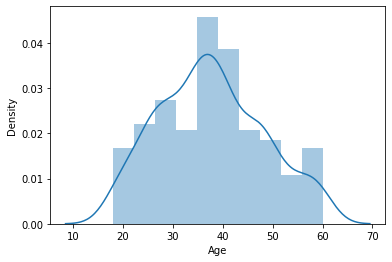

In [15]:
sns.distplot(df['Age'],bins=10)

c:\users\saaware.partners\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary', ylabel='count'>

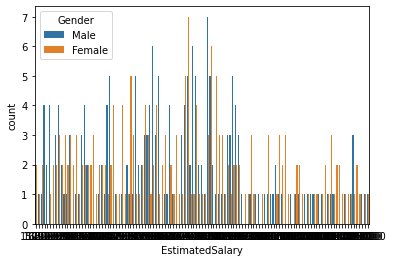

In [20]:
sns.countplot('EstimatedSalary',hue='Gender',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

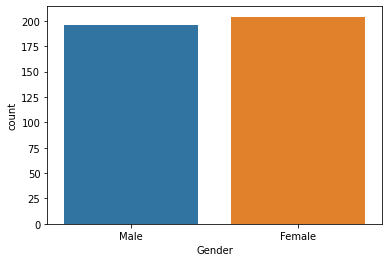

In [22]:
sns.countplot('Gender',data=df)

c:\users\saaware.partners\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

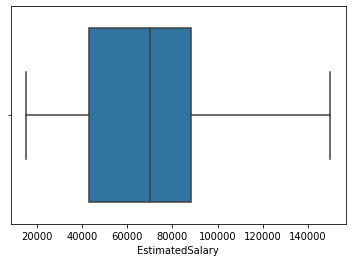

In [23]:
sns.boxplot('EstimatedSalary',data=df)

# Step 2: Split the dataset for testing and training

In [98]:
from sklearn.model_selection import train_test_split


In [99]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.33,random_state=0) #test_size we can take 33%,50% ,20% of data
Y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1],
      dtype=int64)

# Step 3: Here need to do Feature scalling for X_train and X_test
The reason for for feature scalling bcoz here some numbers are long and some are small hence the accuracy not maintaine

In order to make it more accurate did the feature scalling

In [100]:
from sklearn.preprocessing import StandardScaler


In [101]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_test

array([[-0.67510971,  0.48721843],
       [ 0.04500731, -0.59835402],
       [-0.22503657,  0.13514088],
       [-0.67510971,  0.25250006],
       [-0.22503657, -0.59835402],
       [-0.9451536 , -1.4785479 ],
       [-0.58509509, -1.62524688],
       [-0.13502194,  2.15958681],
       [-1.75528526, -0.07023769],
       [ 0.85513897, -0.80373259],
       [-0.67510971, -0.62769382],
       [-0.85513897, -0.45165504],
       [-0.04500731, -0.45165504],
       [ 0.13502194,  0.19382047],
       [-1.575256  ,  0.45787864],
       [-0.49508046,  1.36741231],
       [-0.04500731,  0.19382047],
       [-1.66527063,  0.42853884],
       [ 1.575256  ,  1.74882966],
       [-0.22503657, -1.41986831],
       [-0.22503657, -0.68637341],
       [ 0.85513897,  2.15958681],
       [ 0.3150512 , -0.56901423],
       [ 0.85513897,  1.01533476],
       [-1.30521211, -1.24382954],
       [ 1.03516823,  2.07156742],
       [-0.85513897,  0.48721843],
       [-0.76512434,  0.28183986],
       [-0.04500731,

# step 4: Fitting required model like Logistic Regression model

In [102]:
from sklearn.linear_model import LogisticRegression


In [103]:
lgr = LogisticRegression(random_state=0)

lgr.fit(X_train,Y_train)


LogisticRegression(random_state=0)

# step 5 : predict the result 

In [104]:
pred_result = lgr.predict(X_test)
pred_result

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1],
      dtype=int64)

# Step 6: Do some visualization with predicted decision boundry

In [105]:
from matplotlib.colors import ListedColormap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


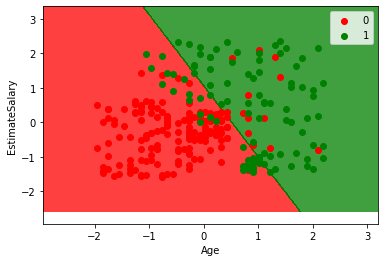

In [111]:
X_abc,Y_abc=X_train,Y_train
x1,x2= np.meshgrid(np.arange(start=X_abc[:,0].min()-1,stop=X_abc[:,0].max()+1,step=0.01),
                   np.arange(start=X_abc[:,1].min()-1,stop=X_abc[:,1].max()+1,step=0.01))

plt.contourf(x1,x2,lgr.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha =0.75 , cmap =ListedColormap(('red','green')))

plt.xlim(x1.min(),x1.max())
plt.ylim(x1.min(),x2.max())

for i , j  in enumerate (np.unique(Y_abc)):
    plt.scatter(X_abc[Y_abc==j,0],X_abc[Y_abc==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
    
plt.xlabel('Age')
plt.ylabel('EstimateSalary')
plt.legend()
plt.show()


#due to memrory allocation issue not plot graph

# Step 7: Confusion matrix

In [107]:
from sklearn.metrics import confusion_matrix

In [108]:
cm=confusion_matrix(Y_test,pred_result)  # predicted result and Y test checking accuracy of model
cm

array([[79,  5],
       [12, 36]], dtype=int64)

In [109]:
# how its calculate?
79+5+12+36

132

In [110]:
#132 --observation we have

#High accuarce check
79+36 / 132

79.27272727272727

In [ ]:
#79.27 is our accuarce!